In [1]:
import pandas as pd
import numpy as np
from datetime import *
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('/Users/guwu/Desktop/nov2020_homework-main/data/Assignment 3 - timeseries_data.xlsx',index_col=0)

In [3]:
df['PEAKTYPE'].unique()

array(['OFFPEAK', 'WEPEAK', 'WDPEAK'], dtype=object)

In [4]:
Convert_dic1 = {'JANUARY':1,'FEBRUARY':2, 'MARCH':3, 'APRIL':4, 'MAY':5, 'JUNE':6, 'JULY':7, 'AUGUST':8,'SEPTEMBER':9, 'OCTOBER':10, 'NOVEMBER':11,'DECEMBER':12}
Convert_dic2 = {'OFFPEAK':1,'WEPEAK':2, 'WDPEAK':3 }

In [5]:
for i in range(df.shape[0]):
    df.iloc[i,7] = Convert_dic1[df.iloc[i,7]]
    df.iloc[i,6] = Convert_dic2[df.iloc[i,6]]

In [6]:
df

,HB_NORTH (RTLMP),ERCOT (WIND_RTI),ERCOT (GENERATION_SOLAR_RT),ERCOT (RTLOAD),HOURENDING,MARKETDAY,PEAKTYPE,MONTH,YEAR
DATETIME,,,,,,,,,
2017-01-01 01:00:00,23.3575,2155.31,0.00,29485.791355,1,2017-01-01,1,1,2017
2017-01-01 02:00:00,21.4650,2313.81,0.00,28911.565913,2,2017-01-01,1,1,2017
2017-01-01 03:00:00,20.7350,2587.68,0.00,28238.258175,3,2017-01-01,1,1,2017
2017-01-01 04:00:00,20.2700,2748.65,0.00,27821.000513,4,2017-01-01,1,1,2017
2017-01-01 05:00:00,20.1200,2757.49,0.00,27646.942413,5,2017-01-01,1,1,2017
...,...,...,...,...,...,...,...,...,...
2018-09-17 08:00:00,20.8600,3195.52,2.04,41902.240000,8,2018-09-17,3,9,2018
2018-09-17 09:00:00,22.7675,2605.50,111.59,43014.370000,9,2018-09-17,3,9,2018
2018-09-17 10:00:00,31.0600,2034.80,261.65,45782.550000,10,2018-09-17,3,9,2018


In [7]:
df_new = df.loc[:,['HB_NORTH (RTLMP)', 'ERCOT (WIND_RTI)', 'ERCOT (GENERATION_SOLAR_RT)', 'ERCOT (RTLOAD)']]

In [8]:
df_new = df_new.fillna(0)

In [9]:
df_new

,HB_NORTH (RTLMP),ERCOT (WIND_RTI),ERCOT (GENERATION_SOLAR_RT),ERCOT (RTLOAD)
DATETIME,,,,
2017-01-01 01:00:00,23.3575,2155.31,0.00,29485.791355
2017-01-01 02:00:00,21.4650,2313.81,0.00,28911.565913
2017-01-01 03:00:00,20.7350,2587.68,0.00,28238.258175
2017-01-01 04:00:00,20.2700,2748.65,0.00,27821.000513
2017-01-01 05:00:00,20.1200,2757.49,0.00,27646.942413
...,...,...,...,...
2018-09-17 08:00:00,20.8600,3195.52,2.04,41902.240000
2018-09-17 09:00:00,22.7675,2605.50,111.59,43014.370000
2018-09-17 10:00:00,31.0600,2034.80,261.65,45782.550000


In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

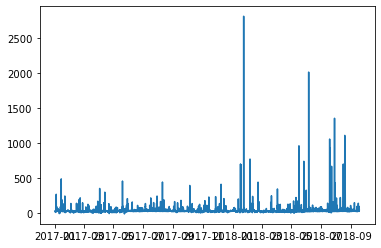

In [13]:
plt.plot(df_new['HB_NORTH (RTLMP)'])

In [14]:
def prepare_data(timeseries_data, n_features):
    X, y =[],[]
    for i in range(len(timeseries_data)):

        end_ix = i + n_features

        if end_ix > len(timeseries_data)-1:
            break

        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [30]:
timeseries_data = np.array(df_new['HB_NORTH (RTLMP)'])[:14000]
n_steps = 10


In [31]:
X, y = prepare_data(timeseries_data, n_steps)

In [32]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [33]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=100, verbose=1)

Train on 13990 samples
Epoch 1/100
13990/13990 [==============================] - 20s 1ms/sample - loss: 1830.7828
Epoch 2/100
13990/13990 [==============================] - 15s 1ms/sample - loss: 3193.7530
Epoch 3/100
13990/13990 [==============================] - 15s 1ms/sample - loss: 1969.2005
Epoch 4/100
13990/13990 [==============================] - 15s 1ms/sample - loss: 1892.7999
Epoch 5/100
13990/13990 [==============================] - 15s 1ms/sample - loss: 2200.0857
Epoch 6/100
13990/13990 [==============================] - 15s 1ms/sample - loss: 2054.2763
Epoch 7/100
13990/13990 [==============================] - 15s 1ms/sample - loss: 2042.1693
Epoch 8/100
13990/13990 [==============================] - 15s 1ms/sample - loss: 2026.4101
Epoch 9/100
13990/13990 [==============================] - 16s 1ms/sample - loss: 1983.6088
Epoch 10/100
13990/13990 [==============================] - 15s 1ms/sample - loss: 1935.6579
Epoch 11/100
13990/13990 [==============================

Epoch 89/100
13990/13990 [==============================] - 16s 1ms/sample - loss: 1453.9387
Epoch 90/100
13990/13990 [==============================] - 16s 1ms/sample - loss: 1451.3563
Epoch 91/100
13990/13990 [==============================] - 16s 1ms/sample - loss: 1427.7053
Epoch 92/100
13990/13990 [==============================] - 16s 1ms/sample - loss: 1414.8543
Epoch 93/100
13990/13990 [==============================] - 16s 1ms/sample - loss: 1418.2927
Epoch 94/100
13990/13990 [==============================] - 18s 1ms/sample - loss: 1386.6478
Epoch 95/100
13990/13990 [==============================] - 18s 1ms/sample - loss: 1365.9617
Epoch 96/100
13990/13990 [==============================] - 18s 1ms/sample - loss: 1361.0785
Epoch 97/100
13990/13990 [==============================] - 18s 1ms/sample - loss: 1454.9136
Epoch 98/100
13990/13990 [==============================] - 17s 1ms/sample - loss: 1853.7286
Epoch 99/100
13990/13990 [==============================] - 16s 1ms/sa

In [34]:
df_new.shape

(14987, 7)

In [95]:
x_input = np.array(df_new['HB_NORTH (RTLMP)'])[-987:-977]
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>10):
        x_input=np.array(temp_input[1:])

        x_input = x_input.reshape((1, n_steps, n_features))

        yhat = model.predict(x_input, verbose=0)

        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]

        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)

        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[20.726612, 18.281954, 16.023207, 13.238302, 10.981655, 8.775976, 5.4515343, 7.062457, 7.8018227, 8.331507]


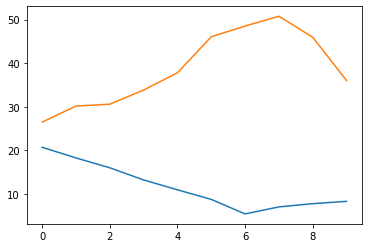

In [96]:
plt.plot(lst_output)
plt.plot(np.array(df_new['HB_NORTH (RTLMP)'])[-987:-977])

In [68]:
import scipy.stats
import statsmodels.api as sm

In [ ]:
#x = np.array(df_new[:,])

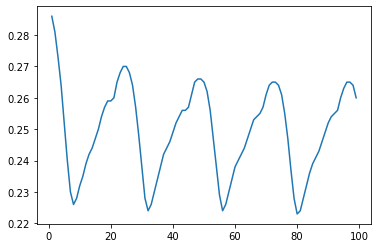

In [81]:
adjRsquared = []
for lag in range(1,100):
    x = np.array(df_new.loc[:,['ERCOT (WIND_RTI)', 'ERCOT (GENERATION_SOLAR_RT)', 'ERCOT (RTLOAD)']][:-lag])
    y = np.array(df_new['HB_NORTH (RTLMP)'][lag:])
    mod = sm.OLS(y,x)
    res=mod.fit()
    results_as_html = res.summary().tables[0].as_html()
    ols_table=pd.read_html(results_as_html, header=0, index_col=0)[0]
    adjRsquared.append(ols_table.iloc[0,2])
plt.plot(list(range(1,100)),adjRsquared)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.289
Model:                            OLS   Adj. R-squared (uncentered):              0.289
Method:                 Least Squares   F-statistic:                              2031.
Date:                Tue, 09 Feb 2021   Prob (F-statistic):                        0.00
Time:                        14:41:40   Log-Likelihood:                         -78222.
No. Observations:               14987   AIC:                                  1.565e+05
Df Residuals:                   14984   BIC:                                  1.565e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0014   8.34e-05    -17.122      0.000      -0.002      -0.001
x2             0.0045      0.001      3.995      0.000       0.002       0.007
x3             0.0008   1.99e-05     41.987      0.000       0.001       0.001
==============================================================================
Omnibus:                    39247.497   Durbin-Watson:                   1.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1245406199.061
Skew:                          30.549   Prob(JB):                         0.00
Kurtosis:                    1413.902   Cond. No.                         135.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
timeseries_data = [1,2,3,4,5,6,7]
n_steps = 3
X, y = prepare_data(timeseries_data, n_steps)

In [83]:
X

array([[1, 2, 3],
       [2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

In [84]:
y

array([4, 5, 6, 7])

In [88]:
df_new.loc[:,['ERCOT (WIND_RTI)', 'ERCOT (GENERATION_SOLAR_RT)','ERCOT (RTLOAD)']]

,ERCOT (WIND_RTI),ERCOT (GENERATION_SOLAR_RT),ERCOT (RTLOAD)
DATETIME,,,
2017-01-01 01:00:00,2155.31,0.00,29485.791355
2017-01-01 02:00:00,2313.81,0.00,28911.565913
2017-01-01 03:00:00,2587.68,0.00,28238.258175
2017-01-01 04:00:00,2748.65,0.00,27821.000513
2017-01-01 05:00:00,2757.49,0.00,27646.942413
...,...,...,...
2018-09-17 08:00:00,3195.52,2.04,41902.240000
2018-09-17 09:00:00,2605.50,111.59,43014.370000
2018-09-17 10:00:00,2034.80,261.65,45782.550000


In [89]:
df_new

,HB_NORTH (RTLMP),ERCOT (WIND_RTI),ERCOT (GENERATION_SOLAR_RT),ERCOT (RTLOAD)
DATETIME,,,,
2017-01-01 01:00:00,23.3575,2155.31,0.00,29485.791355
2017-01-01 02:00:00,21.4650,2313.81,0.00,28911.565913
2017-01-01 03:00:00,20.7350,2587.68,0.00,28238.258175
2017-01-01 04:00:00,20.2700,2748.65,0.00,27821.000513
2017-01-01 05:00:00,20.1200,2757.49,0.00,27646.942413
...,...,...,...,...
2018-09-17 08:00:00,20.8600,3195.52,2.04,41902.240000
2018-09-17 09:00:00,22.7675,2605.50,111.59,43014.370000
2018-09-17 10:00:00,31.0600,2034.80,261.65,45782.550000


In [116]:
timeseries_data = np.array(df_new['HB_NORTH (RTLMP)'])[:14000]
n_steps = 10
X, y = prepare_data(timeseries_data, n_steps)
cc = np.array(df_new.loc[:,['ERCOT (WIND_RTI)', 'ERCOT (GENERATION_SOLAR_RT)','ERCOT (RTLOAD)']][10:14000])
X = np.hstack((X,cc))
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [118]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps + 3, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=100, verbose=1)

Train on 13990 samples
Epoch 1/100
13990/13990 [==============================] - 23s 2ms/sample - loss: 7229.7368
Epoch 2/100
13990/13990 [==============================] - 20s 1ms/sample - loss: 2233.1779
Epoch 3/100
13990/13990 [==============================] - 20s 1ms/sample - loss: 2310.0243
Epoch 4/100
13990/13990 [==============================] - 22s 2ms/sample - loss: 1993.7699
Epoch 5/100
13990/13990 [==============================] - 21s 1ms/sample - loss: 1915.2879
Epoch 6/100
13990/13990 [==============================] - 20s 1ms/sample - loss: 1787.5980
Epoch 7/100
13990/13990 [==============================] - 20s 1ms/sample - loss: 1709.7775
Epoch 8/100
13990/13990 [==============================] - 20s 1ms/sample - loss: 1862.8258
Epoch 9/100
13990/13990 [==============================] - 20s 1ms/sample - loss: 6977.5968
Epoch 10/100
13990/13990 [==============================] - 20s 1ms/sample - loss: 2200.8528
Epoch 11/100
13990/13990 [==============================

In [120]:
X.shape

(13990, 13, 1)

In [132]:
test_ts = np.array(df_new['HB_NORTH (RTLMP)'])[13990:]
test_X ,_ = prepare_data(test_ts, 10)

(987, 10)

In [133]:
test_features = np.array(df_new.loc[:,['ERCOT (WIND_RTI)', 'ERCOT (GENERATION_SOLAR_RT)','ERCOT (RTLOAD)']][14000:])

In [134]:
test_X = np.hstack((test_X,test_features))

In [135]:
result = []
for i in range(10):
    ii = test_X[i].reshape((1, n_steps+3, n_features))
    yhat = model.predict(ii, verbose=0)
    result.append(yhat[0][0])

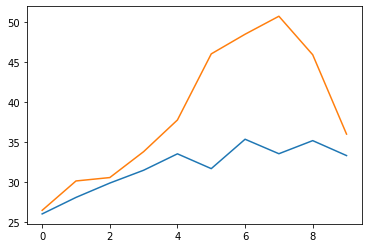

In [137]:
plt.plot(result)
plt.plot(np.array(df_new['HB_NORTH (RTLMP)'])[-987:-977])

In [11]:
df_new.describe()

,HB_NORTH (RTLMP),ERCOT (WIND_RTI),ERCOT (GENERATION_SOLAR_RT),ERCOT (RTLOAD)
count,14987.000000,14987.000000,14987.000000,14987.000000
mean,25.766417,7529.923293,291.911783,42371.673703
std,46.361945,3994.588069,370.895763,9874.339631
min,-17.860000,0.000000,0.000000,25566.511248
25%,18.041250,4133.925000,0.000000,35431.636526
50%,20.057500,7278.960000,21.930000,39934.007113
75%,25.030000,10851.280000,608.580000,47873.100786
max,2809.357500,20350.400000,1257.540000,73264.662123


/Users/guwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


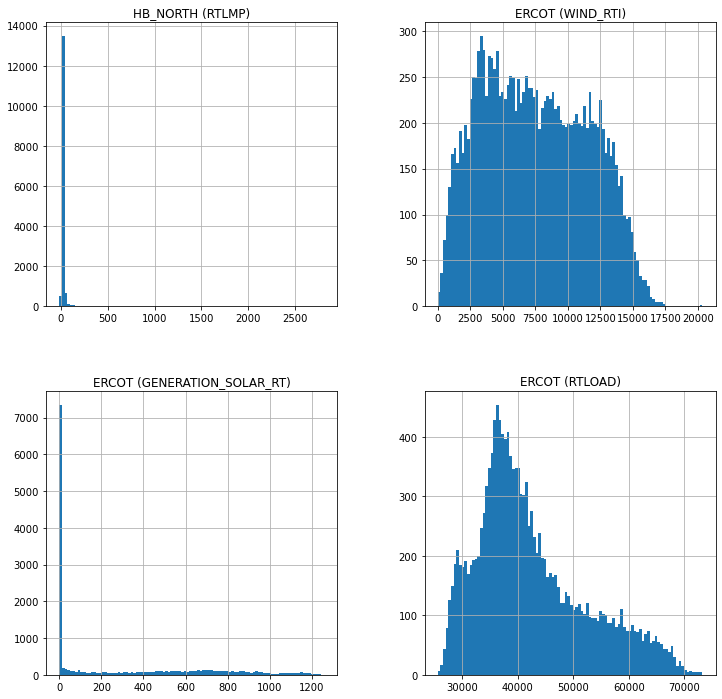

In [12]:
fig, ax = plt.subplots(figsize=(12, 12))
df_hist=df_new.hist(ax=ax,bins=100)

In [13]:
df_new.columns

Index(['HB_NORTH (RTLMP)', 'ERCOT (WIND_RTI)', 'ERCOT (GENERATION_SOLAR_RT)',
       'ERCOT (RTLOAD)'],
      dtype='object')

In [14]:
mask2017 = (df_new.index.year==2017)
df_2017 = df_new.loc[mask2017,:]
temp = df_2017.groupby(df_2017.index.month).mean()

In [15]:
temp

,HB_NORTH (RTLMP),ERCOT (WIND_RTI),ERCOT (GENERATION_SOLAR_RT),ERCOT (RTLOAD)
DATETIME,,,,
1,24.891662,7277.197739,115.634657,36710.014582
2,19.155112,7982.691801,165.644211,34196.325342
3,19.337439,8882.907281,204.985653,34939.229894
4,21.817990,9036.920069,249.254681,36214.939177
5,25.455531,7909.695524,265.994946,40486.361001
6,24.819663,6499.807903,290.358375,47203.659375
7,28.713145,5535.004489,312.130148,51607.844156
8,26.585897,4444.675161,311.640538,48963.224929
9,23.398274,6156.641931,276.135861,44623.462973


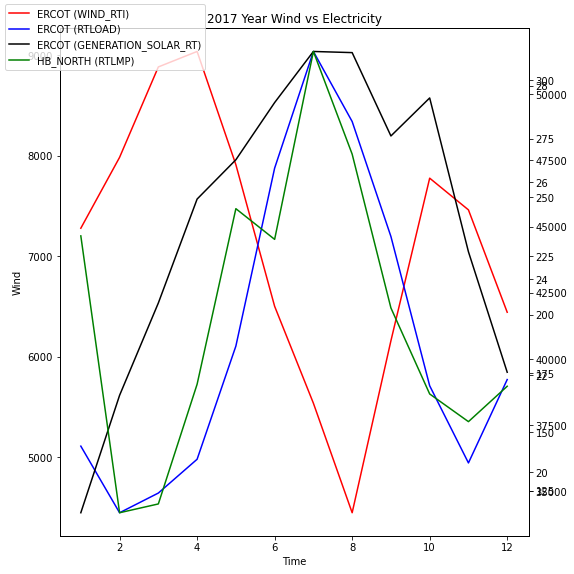

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))
color = 'red'
ax.plot(temp.index,temp.loc[:,"ERCOT (WIND_RTI)"],label="ERCOT (WIND_RTI)",color=color)
ax.set(title="2017 Year Wind vs Electricity",xlabel="Time", ylabel="Wind")

ax2 = ax.twinx()
color = 'blue'
ax2.plot(temp.index,temp.loc[:,"ERCOT (RTLOAD)"],label="ERCOT (RTLOAD)",color=color)


ax3 = ax.twinx()
color = 'black'
ax3.plot(temp.index,temp.loc[:,"ERCOT (GENERATION_SOLAR_RT)"],label="ERCOT (GENERATION_SOLAR_RT)",color=color)


ax4 = ax.twinx()
color = 'green'
ax4.plot(temp.index,temp.loc[:,"HB_NORTH (RTLMP)"],label="HB_NORTH (RTLMP)",color=color)


fig.legend(loc="upper left")
fig.tight_layout()
plt.show()

In [18]:
mask2018 = (df_new.index.year==2018)
df_2018 = df_new.loc[mask2018,:]
temp = df_2018.groupby(df_2018.index.month).mean()

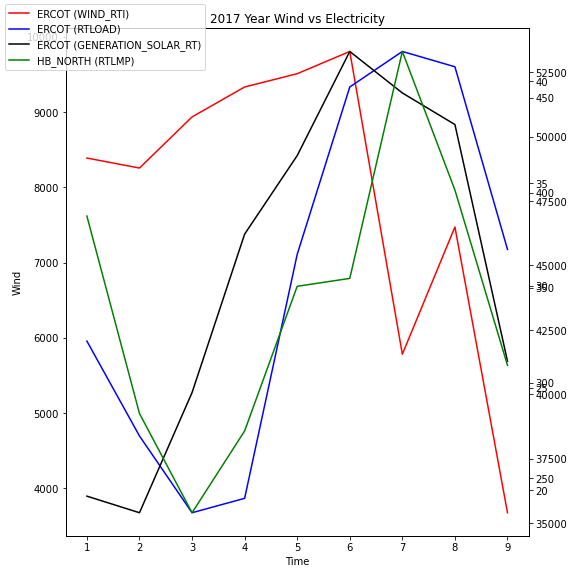

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))
color = 'red'
ax.plot(temp.index,temp.loc[:,"ERCOT (WIND_RTI)"],label="ERCOT (WIND_RTI)",color=color)
ax.set(title="2017 Year Wind vs Electricity",xlabel="Time", ylabel="Wind")

ax2 = ax.twinx()
color = 'blue'
ax2.plot(temp.index,temp.loc[:,"ERCOT (RTLOAD)"],label="ERCOT (RTLOAD)",color=color)


ax3 = ax.twinx()
color = 'black'
ax3.plot(temp.index,temp.loc[:,"ERCOT (GENERATION_SOLAR_RT)"],label="ERCOT (GENERATION_SOLAR_RT)",color=color)


ax4 = ax.twinx()
color = 'green'
ax4.plot(temp.index,temp.loc[:,"HB_NORTH (RTLMP)"],label="HB_NORTH (RTLMP)",color=color)


fig.legend(loc="upper left")
fig.tight_layout()
plt.show()

In [172]:
temp = df_new.groupby(df_new.index.weekday).mean()


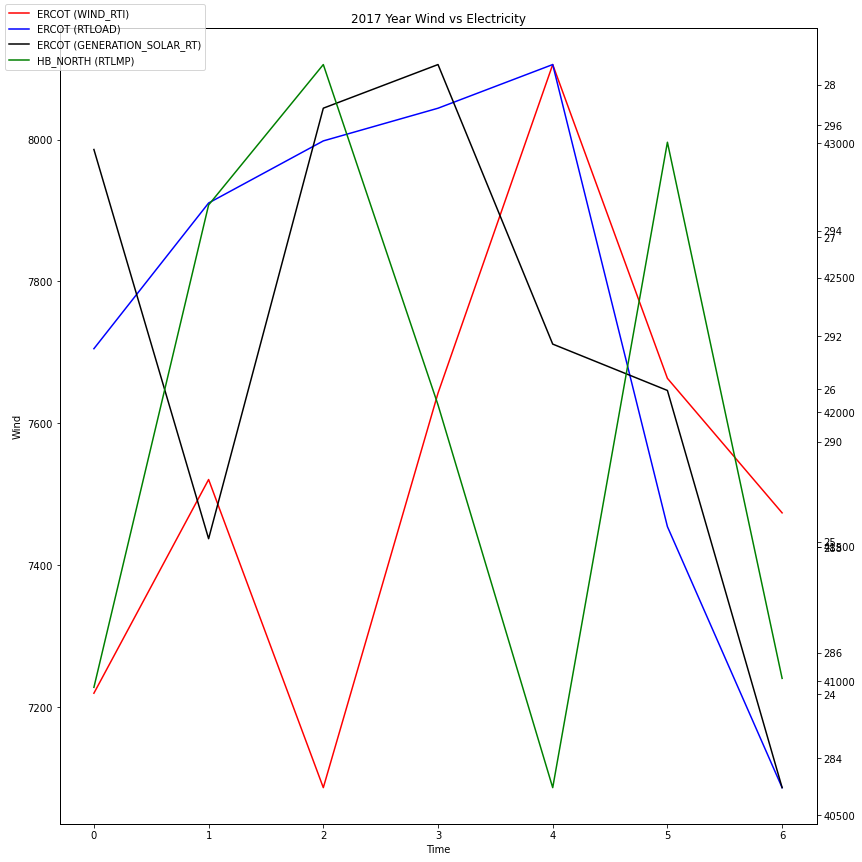

In [173]:
fig, ax = plt.subplots(figsize=(12, 12))
color = 'red'
ax.plot(temp.index,temp.loc[:,"ERCOT (WIND_RTI)"],label="ERCOT (WIND_RTI)",color=color)
ax.set(title="2017 Year Wind vs Electricity",xlabel="Time", ylabel="Wind")

ax2 = ax.twinx()
color = 'blue'
ax2.plot(temp.index,temp.loc[:,"ERCOT (RTLOAD)"],label="ERCOT (RTLOAD)",color=color)


ax3 = ax.twinx()
color = 'black'
ax3.plot(temp.index,temp.loc[:,"ERCOT (GENERATION_SOLAR_RT)"],label="ERCOT (GENERATION_SOLAR_RT)",color=color)


ax4 = ax.twinx()
color = 'green'
ax4.plot(temp.index,temp.loc[:,"HB_NORTH (RTLMP)"],label="HB_NORTH (RTLMP)",color=color)


fig.legend(loc="upper left")
fig.tight_layout()
plt.show()

In [20]:
temp = df_new.groupby(df_new.index.hour).mean()

In [178]:
temp

,HB_NORTH (RTLMP),ERCOT (WIND_RTI),ERCOT (GENERATION_SOLAR_RT),ERCOT (RTLOAD)
DATETIME,,,,
0,19.017784,9234.548670,0.537933,40030.304267
1,18.668752,9197.391712,0.527440,37440.974017
2,16.915575,8950.465575,0.523818,35698.901017
3,15.991260,8749.345522,0.526051,34579.047170
4,15.774428,8476.049520,0.521360,33943.856586
5,16.514760,8185.846288,0.368368,33974.466030
6,18.829272,7910.895920,0.161696,35076.103159
7,28.629036,7697.309936,0.235168,37271.394016
8,21.241200,7417.014944,40.738256,38548.998262


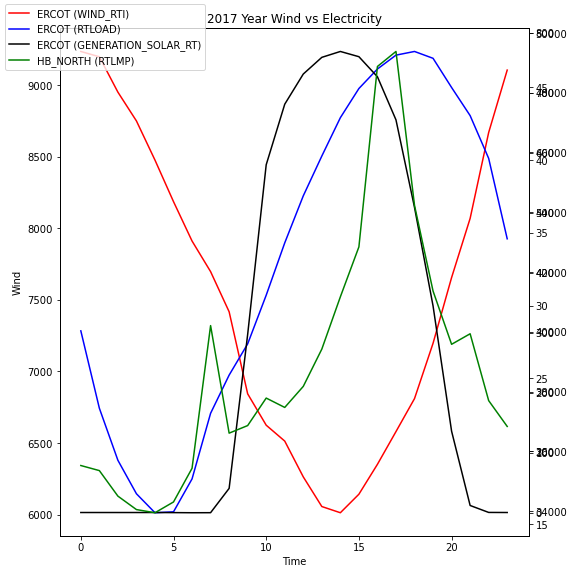

In [21]:
fig, ax = plt.subplots(figsize=(8, 8))
color = 'red'
ax.plot(temp.index,temp.loc[:,"ERCOT (WIND_RTI)"],label="ERCOT (WIND_RTI)",color=color)
ax.set(title="2017 Year Wind vs Electricity",xlabel="Time", ylabel="Wind")

ax2 = ax.twinx()
color = 'blue'
ax2.plot(temp.index,temp.loc[:,"ERCOT (RTLOAD)"],label="ERCOT (RTLOAD)",color=color)


ax3 = ax.twinx()
color = 'black'
ax3.plot(temp.index,temp.loc[:,"ERCOT (GENERATION_SOLAR_RT)"],label="ERCOT (GENERATION_SOLAR_RT)",color=color)


ax4 = ax.twinx()
color = 'green'
ax4.plot(temp.index,temp.loc[:,"HB_NORTH (RTLMP)"],label="HB_NORTH (RTLMP)",color=color)


fig.legend(loc="upper left")
fig.tight_layout()
plt.show()

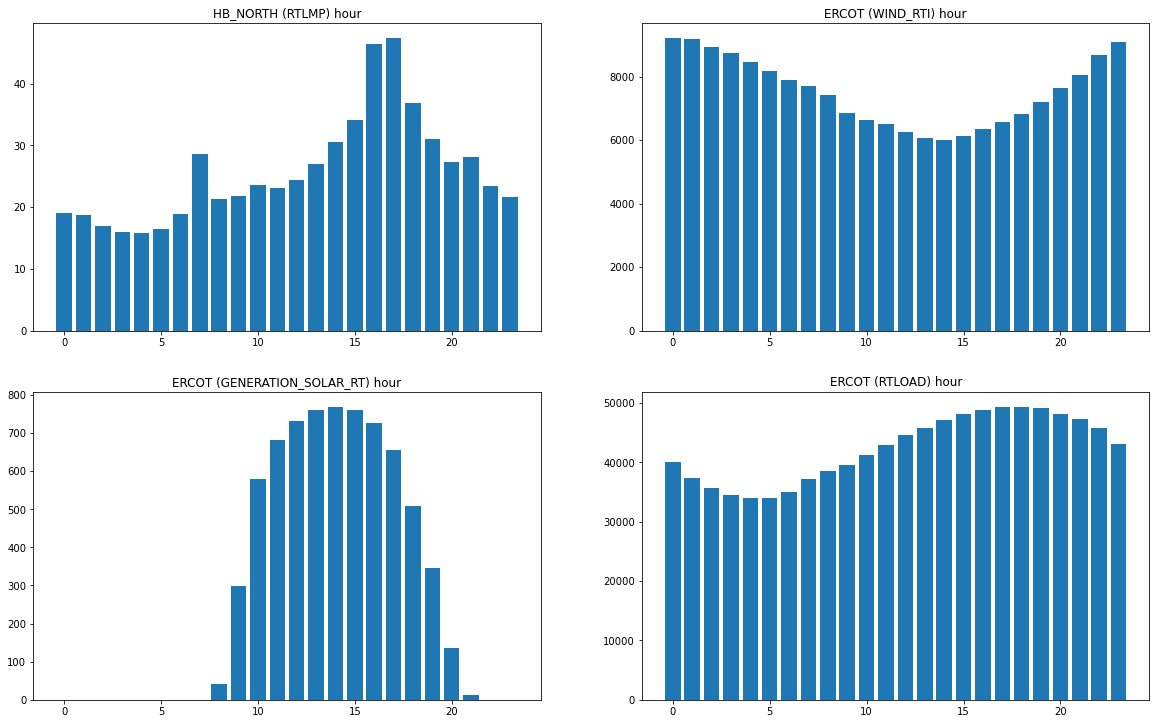

In [176]:
df1_sum=temp
fig = plt.figure(figsize=(20,60))
for col in range(len(df1_sum.columns.to_list())):
    ax = fig.add_subplot(9,2,col+1)
    name=df1_sum.columns.to_list()[col]
    ax.set(title="{} hour".format(name))
    ax.bar(df1_sum.iloc[:,col].index,height=df1_sum.iloc[:,col],label="{}".format(name))